In [ ]:
#importar librerías
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
#leer dataframe
df = pd.read_csv("covid_clean.csv")

In [ ]:
#Dividir la base de datos en caracetrísticas y etiqueta de clase. 
X = df.drop('FECHA_DEF', axis=1)
y = df['FECHA_DEF']

df.head()

,SEXO,INTUBADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,FECHA_DEF
0,0,0,0,63,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,58,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,84,0,1,0,0,0,1,1,0,0,0,0
3,0,0,0,28,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,36,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
#Definir características del modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#Parámetros necesarios
training_epochs = 400 # Numero de intentos
learning_rate = 0.03 # Learning rate

In [ ]:
#Definir capas, kernel, tipo de activación, etc. 
def create_model():
    model = Sequential()
    # Capa de entrada
    model.add(Dense(6, input_dim = 14, kernel_initializer = 'normal', activation = 'relu'))
    # Capa de salida
    model.add(Dense(1, activation = 'sigmoid'))

    # Compilar el modelo
    model.compile(loss = 'binary_crossentropy', optimizer = Adam(learning_rate), metrics = ['accuracy'])
    return model

In [ ]:
#Ver las especificaciones del modelo creado
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6)                 90        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Entrenar a la red neuronal
results = model.fit(
    X_train, y_train.T,
    epochs= training_epochs,
    batch_size = 500,
    validation_data = (X_test, y_test.T),
    verbose = 0
)

In [ ]:
#Predecir
prediction_values = model.predict(X_test)

1465/1465 [==============================] - 3s 2ms/step


In [ ]:
#Accuracy
print("Test-Accuracy:","%.2f%%" % (np.mean(results.history["val_accuracy"])*100))

Test-Accuracy: 88.22%


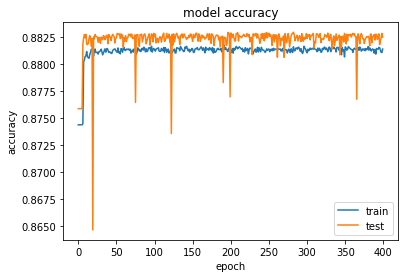

In [ ]:
#Graficar accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

Maximum Loss : 0.3450

Minimum Loss : 0.3007


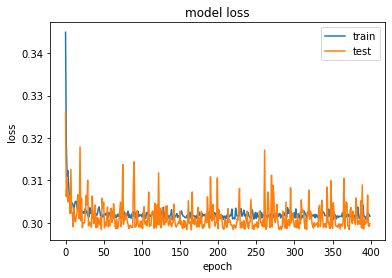

In [ ]:
#Graficar perdida
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))

In [ ]:
#Matriz de confusión
from prettytable import PrettyTable
from sklearn.metrics import confusion_matrix

prediction_values = np.round(prediction_values)
confusion = confusion_matrix(y_test, prediction_values)
table = PrettyTable()
table.add_column("", ["Pred. Muerto", "Pred. Vivo"])
table.add_column("Real Muerto", confusion[0])
table.add_column("Real Vivo", confusion[1])
print(table)

+--------------+-------------+-----------+
|              | Real Muerto | Real Vivo |
+--------------+-------------+-----------+
| Pred. Muerto |    40726    |    5193   |
|  Pred. Vivo  |     314     |    624    |
+--------------+-------------+-----------+
